In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
data=pd.read_csv('numerical_df.csv')
pd.set_option('display.max_columns', None)
data.head()

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,2763.519279,56274,69,32,5,0,1,384.811147
1,1,6979.535903,0,94,13,42,0,8,1131.464935
2,2,12887.431650,48767,108,18,38,0,2,566.472247
3,3,7645.861827,0,106,18,65,0,7,529.881344
4,4,2813.692575,43836,73,12,44,0,1,138.130879


In [3]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_num = data.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
x_norm = pd.DataFrame(x_normalized, columns=X_num.columns)
x_norm.head()

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.000000,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.000109,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.000219,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.000328,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.000438,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


In [4]:
y = data['total_claim_amount']
X = data.drop('total_claim_amount', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.566751,0.214185,0.227929,0.037975,0.314286,0.686869,0.0,0.125
1,0.079400,0.005043,0.208191,0.000000,0.942857,0.616162,0.0,0.000
2,0.038550,0.008107,0.000000,0.046414,0.200000,0.777778,0.0,0.000
3,0.487898,0.126940,0.000000,0.236287,0.428571,0.686869,0.0,0.125
4,0.806264,0.068202,0.262492,0.016878,0.314286,0.393939,0.0,0.125
...,...,...,...,...,...,...,...,...
7302,0.612529,0.333447,0.210782,0.565401,0.171429,0.474747,0.0,0.125
7303,0.354726,0.037743,0.988225,0.265823,0.200000,0.363636,0.2,0.000
7304,0.094185,0.156427,0.000000,0.329114,0.142857,0.565657,0.0,0.125
7305,0.917862,0.079637,0.196907,0.236287,0.485714,0.414141,0.2,1.000


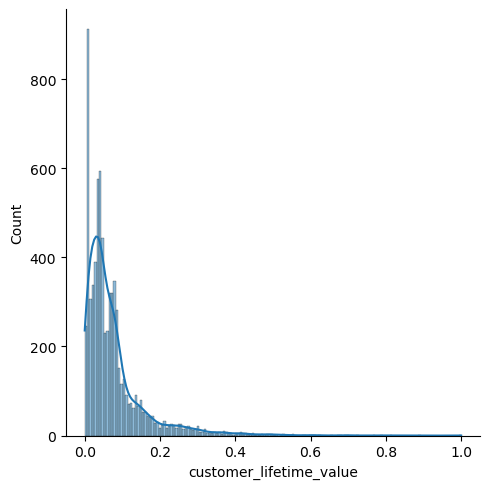

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(X_train_norm['customer_lifetime_value'], kde=True)
plt.show()


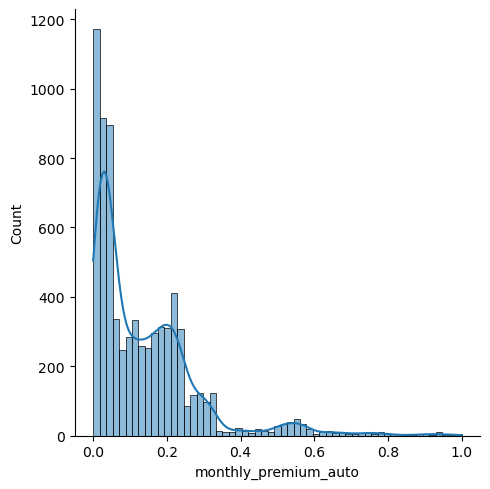

In [13]:
sns.displot(X_train_norm['monthly_premium_auto'], kde=True)
plt.show()

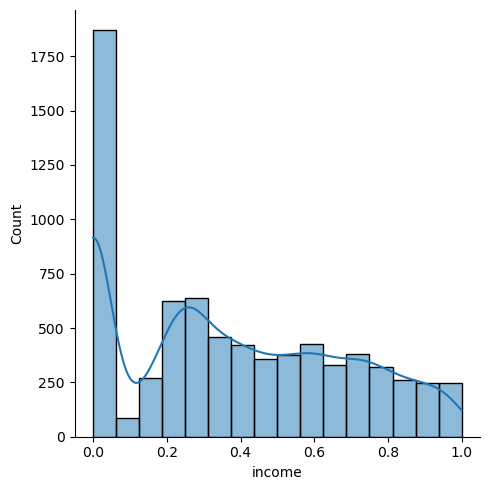

In [14]:
sns.displot(X_train_norm['income'], kde=True)
plt.show()

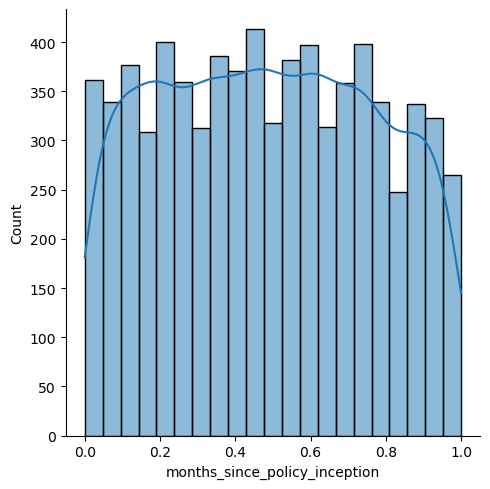

In [15]:
sns.displot(X_train_norm['months_since_policy_inception'], kde=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

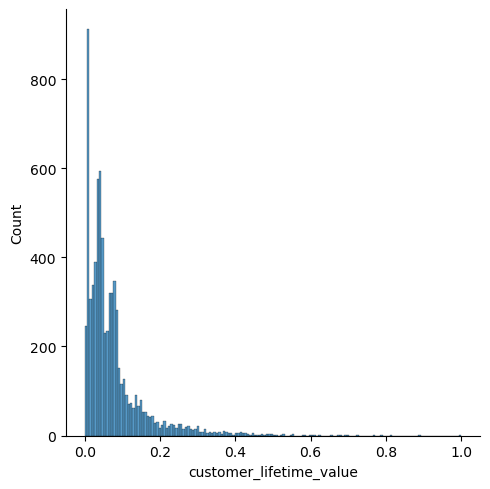

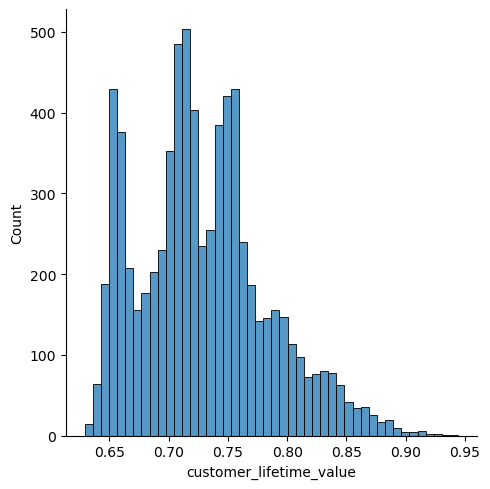

In [16]:
sns.displot(X_train_norm['customer_lifetime_value']) # normalized
sns.displot(X_train_num['customer_lifetime_value'].apply(lambda x:np.log(x) if x>0 else x)/12) # /12? (log transformed)
plt.show

In [18]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression classifier
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)


ValueError: Unknown label type: 'continuous'